In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)



In [3]:
file_path = r"C:\Users\sowmy\OneDrive\Desktop\IS\Housing_price_model.csv"
df= pd.read_csv(file_path)
print(df.shape)
df.head()

(109, 37)


,State,Country,Property Type,Sub_Area,Company_Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,TownShip Name/ Society Name,Description,Property Area in Sq. Ft.,Price in $ (lakhs),Price by sub-area,Amenities score,Price by Amenities score,Noun_Counts,Verb_Counts,Adjective_Counts,bhk homes,clubhouse park,community offers,connectivity modern,families proximity,gym perfect,homes large,large clubhouse,park gym,perfect families,properties offering,proximity schools,schools shopping,shopping malls,spacious bhk
0,pennsylvania,usa,1.0,pittsburgh,lennar corporation,1,1,1,1,1,1,1,the heights at falling water,modern community bhk properties offering luxur...,492.0,39.0,65.701429,7,72.666667,6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,pennsylvania,usa,2.0,philadelphia,toll brothers,1,1,1,1,1,1,1,chestnut hill village,located premium neighborhood bhk property offe...,774.0,65.0,60.295000,7,72.666667,6,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,pennsylvania,usa,3.0,allentown,ryan homes,1,1,1,1,1,1,1,the fields at blue barn,spacious bhk homes large clubhouse park gym pe...,889.0,74.0,83.152500,7,72.666667,6,0,3,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1
3,pennsylvania,usa,3.0,harrisburg,pulte homes,1,1,1,1,1,1,1,the preserve at deer valley,bhk grand properties offering high end ameniti...,1018.0,89.0,82.745000,7,72.666667,4,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,pennsylvania,usa,2.0,lancaster,d.r. horton,1,1,1,1,1,1,1,meadows at wilshire downs,located lancaster coming suburb community offe...,743.0,74.0,87.152000,7,72.666667,3,1,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Selecting only numerical features
cols_to_drop = ['State','Country','Sub_Area','TownShip Name/ Society Name',
                'Description','Company_Name']

features = df.drop(cols_to_drop,axis=1).columns.tolist()
print("Final number of features: "+str(len(features)))

Final number of features: 31


In [7]:
features

['Property Type',
 'ClubHouse',
 'School / University in Township',
 'Hospital in TownShip',
 'Mall in TownShip',
 'Park / Jogging track',
 'Swimming Pool',
 'Gym',
 'Property Area in Sq. Ft.',
 'Price in $ (lakhs)',
 'Price by sub-area',
 'Amenities score',
 'Price by Amenities score',
 'Noun_Counts',
 'Verb_Counts',
 'Adjective_Counts',
 'bhk homes',
 'clubhouse park',
 'community offers',
 'connectivity modern',
 'families proximity',
 'gym perfect',
 'homes large',
 'large clubhouse',
 'park gym',
 'perfect families',
 'properties offering',
 'proximity schools',
 'schools shopping',
 'shopping malls',
 'spacious bhk']

In [9]:
featuresMod = ['PropertyType',
                'ClubHouse',
                'School_University_in_Township',
                'Hospital_in_TownShip',
                'Mall_in_TownShip',
                'Park_Jogging_track',
                'Swimming_Pool',
                'Gym',
                'Property_Area_in_Sq_Ft',
                'Price_in_$_lakhs',
                'Price_by_sub_area',
                'Noun_Counts',
                'Verb_Counts',
                'Adjective_Counts',
               'Amenities_score',
                'Price_by_Amenities_score',
                'bhk_homes',
               'clubhouse_park',
 'community_offers',
 'connectivity_modern',
 'families_proximity',
 'gym_perfect',
 'homes_large',
 'large_clubhouse',
 'park_gym',
 'perfect_families',
 'properties_offering',
 'proximity_schools',
 'schools_shopping',
 'shopping_malls',
 'spacious_bhk']
print(len(featuresMod))

31


In [11]:
dict(zip(features,featuresMod))

{'Property Type': 'PropertyType',
 'ClubHouse': 'ClubHouse',
 'School / University in Township': 'School_University_in_Township',
 'Hospital in TownShip': 'Hospital_in_TownShip',
 'Mall in TownShip': 'Mall_in_TownShip',
 'Park / Jogging track': 'Park_Jogging_track',
 'Swimming Pool': 'Swimming_Pool',
 'Gym': 'Gym',
 'Property Area in Sq. Ft.': 'Property_Area_in_Sq_Ft',
 'Price in $ (lakhs)': 'Price_in_$_lakhs',
 'Price by sub-area': 'Price_by_sub_area',
 'Amenities score': 'Noun_Counts',
 'Price by Amenities score': 'Verb_Counts',
 'Noun_Counts': 'Adjective_Counts',
 'Verb_Counts': 'Amenities_score',
 'Adjective_Counts': 'Price_by_Amenities_score',
 'bhk homes': 'bhk_homes',
 'clubhouse park': 'clubhouse_park',
 'community offers': 'community_offers',
 'connectivity modern': 'connectivity_modern',
 'families proximity': 'families_proximity',
 'gym perfect': 'gym_perfect',
 'homes large': 'homes_large',
 'large clubhouse': 'large_clubhouse',
 'park gym': 'park_gym',
 'perfect families':

In [13]:
#renaming the column names
df_features = df[features]
df_features.columns = featuresMod
print(df_features.shape)
df_features.head()

(109, 31)


,PropertyType,ClubHouse,School_University_in_Township,Hospital_in_TownShip,Mall_in_TownShip,Park_Jogging_track,Swimming_Pool,Gym,Property_Area_in_Sq_Ft,Price_in_$_lakhs,Price_by_sub_area,Noun_Counts,Verb_Counts,Adjective_Counts,Amenities_score,Price_by_Amenities_score,bhk_homes,clubhouse_park,community_offers,connectivity_modern,families_proximity,gym_perfect,homes_large,large_clubhouse,park_gym,perfect_families,properties_offering,proximity_schools,schools_shopping,shopping_malls,spacious_bhk
0,1.0,1,1,1,1,1,1,1,492.0,39.0,65.701429,7,72.666667,6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2.0,1,1,1,1,1,1,1,774.0,65.0,60.295000,7,72.666667,6,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,1,1,1,1,1,1,1,889.0,74.0,83.152500,7,72.666667,6,0,3,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1
3,3.0,1,1,1,1,1,1,1,1018.0,89.0,82.745000,7,72.666667,4,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2.0,1,1,1,1,1,1,1,743.0,74.0,87.152000,7,72.666667,3,1,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Independent variables(X) and Dependent variables(Y)
X = df_features.drop('Price_in_$_lakhs',axis=1)
y = df_features[['Price_in_$_lakhs']]

print(X.shape)
print(y.shape)
#splitting the data, training and testing the data using model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)
print((x_train.shape, x_test.shape), (y_train.shape,y_test.shape))

(109, 30)
(109, 1)
((87, 30), (22, 30)) ((87, 1), (22, 1))


In [16]:
# Training the model
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
print("Training R2 score: "+ str(linear_reg.score(x_train,y_train)))

Training R2 score: 0.7550067783878076


In [19]:
# Predicting on the test data
from sklearn import metrics
pred_lr = linear_reg.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,pred_lr)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,pred_lr)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,pred_lr))))

Test R2 score: 0.6839219566214396
Test MAE: 23.36827228984095
Test RMSE: 32.056112026485096


In [21]:
pd.DataFrame(zip(linear_reg.coef_.T, x_train.columns))

,0,1
0,[14.660546116325877],PropertyType
1,[-26.748942845878517],ClubHouse
2,[-3.6502805968179706],School_University_in_Township
3,[-3.650280596817842],Hospital_in_TownShip
4,[-3.650280596818056],Mall_in_TownShip
5,[1.1546319456101628e-14],Park_Jogging_track
6,[28.15326104741172],Swimming_Pool
7,[11.049480594920688],Gym
8,[0.07082285329025756],Property_Area_in_Sq_Ft
9,[0.11066845357330392],Price_by_sub_area


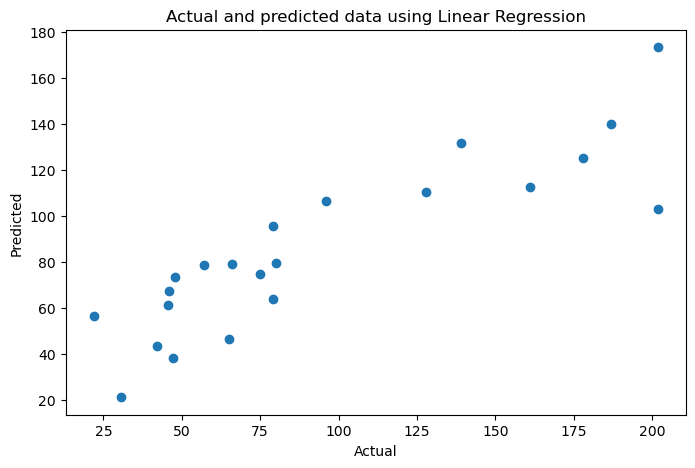

In [23]:
# Plotting the predicted and actual data 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
plt.scatter(y_test,pred_lr)
plt.title("Actual and predicted data using Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [24]:
x_test[:10]

,PropertyType,ClubHouse,School_University_in_Township,Hospital_in_TownShip,Mall_in_TownShip,Park_Jogging_track,Swimming_Pool,Gym,Property_Area_in_Sq_Ft,Price_by_sub_area,Noun_Counts,Verb_Counts,Adjective_Counts,Amenities_score,Price_by_Amenities_score,bhk_homes,clubhouse_park,community_offers,connectivity_modern,families_proximity,gym_perfect,homes_large,large_clubhouse,park_gym,perfect_families,properties_offering,proximity_schools,schools_shopping,shopping_malls,spacious_bhk
93,3.0,1,0,0,0,1,1,1,1388.0,87.152000,4,100.511500,3,1,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
72,3.0,1,0,0,0,1,1,1,923.0,158.244444,4,100.511500,6,0,2,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0
82,2.0,1,0,0,0,1,0,1,644.0,123.614286,3,71.537407,5,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64,3.0,1,0,0,0,1,1,0,990.0,112.170000,3,71.537407,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63,2.5,1,0,0,0,1,1,0,936.0,87.152000,3,71.537407,3,1,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
55,1.0,0,0,0,0,1,1,1,460.0,97.540000,3,71.537407,6,0,2,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0
39,1.0,1,0,0,0,1,1,1,543.0,61.995714,4,100.511500,7,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,3.0,1,0,0,0,1,0,1,1163.0,83.152500,3,71.537407,6,0,3,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1
103,3.0,1,0,0,0,1,1,1,1272.0,223.133333,4,100.511500,3,1,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
68,2.0,1,0,0,0,1,1,1,670.0,61.995714,4,100.511500,7,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
pred_lr[:10] # This is the predicted price for the above test data

array([[125.05067994],
       [103.14348974],
       [ 38.26141207],
       [ 95.71388884],
       [ 74.98936189],
       [ 61.39265758],
       [ 43.72035248],
       [ 79.41324785],
       [131.88407283],
       [ 67.37540097]])

In [29]:
#pip install statsmodels


In [31]:
def get_prediction_interval(prediction, actual_values, predicted_values, pi=.95):
    
    #standard deviation of prediction on the train dataset
    sum_errs = np.sum((actual_values - predicted_values)**2)
    stdev = np.sqrt(sum_errs / (len(actual_values) - 1))
    
    #interval from standard deviation
    one_minus_pi = 1 - pi # pi is 95 remaining is 5
    ppf_lookup = 1 - (one_minus_pi / 2) # higher end of estimation is 97.5
    z_score = stats.norm.ppf(ppf_lookup) 
    interval = z_score * stdev
    
    
    #generate prediction interval lower and upper bound cs_24
    lower, upper = prediction - interval, prediction + interval
    return lower[0], upper[0]

In [32]:
# getting prediction intervals for the test data
from scipy import stats
import statsmodels.api as sm
lower_value = []
upper_value = []

for i in pred_lr:
    lower, upper =  get_prediction_interval(i, y_train.values, linear_reg.predict(x_train).reshape(-1,1))
    lower_value.append(lower)
    upper_value.append(upper)

In [34]:
print(lower_value[:10])
print(upper_value[:10])

[82.84584912488975, 60.93865892868899, -3.943418739025816, 53.509058029487115, 32.784531077116604, 19.18782676934014, 1.5155216721178206, 37.2084170354046, 89.67924201805587, 25.17057015630639]
[167.2555107486077, 145.3483205524069, 80.46624288469211, 137.91871965320505, 117.19419270083452, 103.59748839305806, 85.92518329583575, 121.61807865912252, 174.08890364177378, 109.58023178002432]


In [35]:
df_lr = pd.DataFrame(zip(lower_value,upper_value,pred_lr.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_lr.shape)
df_lr.head()

(22, 3)


,lower,upper,mean
0,82.845849,167.255511,125.050680
1,60.938659,145.348321,103.143490
2,-3.943419,80.466243,38.261412
3,53.509058,137.918720,95.713889
4,32.784531,117.194193,74.989362


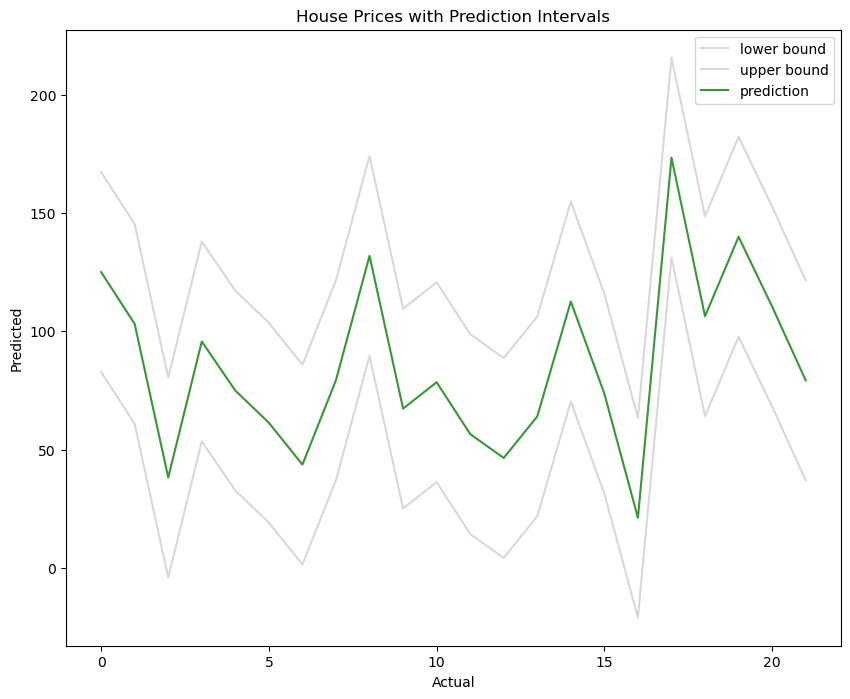

In [36]:
# Plotting the predicted and actual data 
plt.figure(figsize=(10,8))
plt.plot(lower_value,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_value,label='upper bound',alpha=0.3,color='grey')
plt.plot(pred_lr,label='prediction',alpha=0.8,color='green')
plt.xlabel("Actual") #indices of test values
plt.ylabel("Predicted")
plt.title("House Prices with Prediction Intervals")
plt.legend()
plt.show()

In [37]:
# Model training using Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(x_train,y_train)
print("Training R2 score: "+ str(ridge_reg.score(x_train,y_train)))

Training R2 score: 0.753417455457908


In [38]:
# Predicting on the test and evaluating
pred_rr = ridge_reg.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,pred_rr)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,pred_rr)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,pred_rr))))

Test R2 score: 0.6850292631310473
Test MAE: 23.02631235043047
Test RMSE: 31.999912165724727


In [39]:
pd.DataFrame(zip(ridge_reg.coef_.T, x_train.columns))

,0,1
0,[14.389384919744533],PropertyType
1,[-24.222536689165047],ClubHouse
2,[-1.9774776396467122],School_University_in_Township
3,[-1.9774776396467109],Hospital_in_TownShip
4,[-1.9774776396467062],Mall_in_TownShip
5,[0.0],Park_Jogging_track
6,[22.43784675387531],Swimming_Pool
7,[8.719059584001988],Gym
8,[0.0704748730765999],Property_Area_in_Sq_Ft
9,[0.11600303620168448],Price_by_sub_area


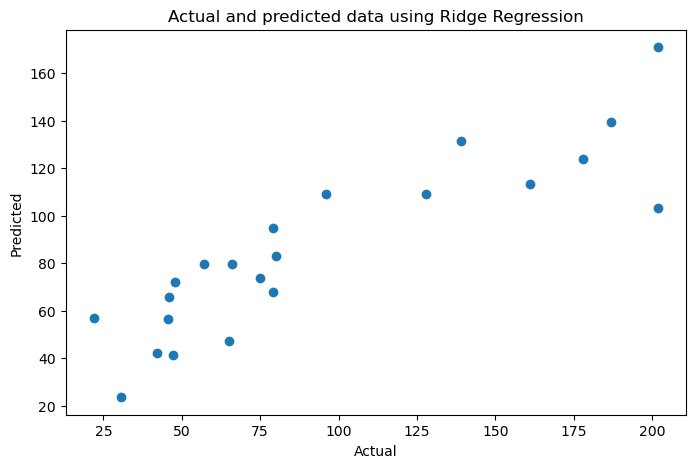

In [40]:
# Plotting the predicted and actual data 
plt.figure(figsize=(8,5))
plt.scatter(y_test,pred_rr)
plt.title("Actual and predicted data using Ridge Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [41]:
x_test[:10]

,PropertyType,ClubHouse,School_University_in_Township,Hospital_in_TownShip,Mall_in_TownShip,Park_Jogging_track,Swimming_Pool,Gym,Property_Area_in_Sq_Ft,Price_by_sub_area,Noun_Counts,Verb_Counts,Adjective_Counts,Amenities_score,Price_by_Amenities_score,bhk_homes,clubhouse_park,community_offers,connectivity_modern,families_proximity,gym_perfect,homes_large,large_clubhouse,park_gym,perfect_families,properties_offering,proximity_schools,schools_shopping,shopping_malls,spacious_bhk
93,3.0,1,0,0,0,1,1,1,1388.0,87.152000,4,100.511500,3,1,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
72,3.0,1,0,0,0,1,1,1,923.0,158.244444,4,100.511500,6,0,2,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0
82,2.0,1,0,0,0,1,0,1,644.0,123.614286,3,71.537407,5,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64,3.0,1,0,0,0,1,1,0,990.0,112.170000,3,71.537407,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63,2.5,1,0,0,0,1,1,0,936.0,87.152000,3,71.537407,3,1,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
55,1.0,0,0,0,0,1,1,1,460.0,97.540000,3,71.537407,6,0,2,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0
39,1.0,1,0,0,0,1,1,1,543.0,61.995714,4,100.511500,7,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,3.0,1,0,0,0,1,0,1,1163.0,83.152500,3,71.537407,6,0,3,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1
103,3.0,1,0,0,0,1,1,1,1272.0,223.133333,4,100.511500,3,1,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
68,2.0,1,0,0,0,1,1,1,670.0,61.995714,4,100.511500,7,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
pred_rr[:10] # This is the predicted price for the above test data

array([[123.83575851],
       [103.17393434],
       [ 41.45916217],
       [ 94.87047519],
       [ 73.56759485],
       [ 56.4461661 ],
       [ 42.24153485],
       [ 83.04120788],
       [131.43492077],
       [ 65.58122865]])

In [50]:
# prediction intervals for the test data
lower_value = []
upper_value = []

for i in pred_rr:
    lower, upper =  get_prediction_interval(i, y_train.values, ridge_reg.predict(x_train).reshape(-1,1))
    lower_value.append(lower)
    upper_value.append(upper)

In [51]:
print(lower_value[:5])
print(upper_value[:5])

[81.49425316019315, 60.83242898839636, -0.8823431792322936, 52.52896984374378, 31.22608949569907]
[166.17726386070265, 145.51543968890587, 83.8006675212772, 137.21198054425327, 115.90910019620857]


In [53]:
df_rid = pd.DataFrame(zip(lower_value,upper_value,pred_rr.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_rid.shape)
df_rid.head()

(22, 3)


,lower,upper,mean
0,81.494253,166.177264,123.835759
1,60.832429,145.515440,103.173934
2,-0.882343,83.800668,41.459162
3,52.528970,137.211981,94.870475
4,31.226089,115.909100,73.567595


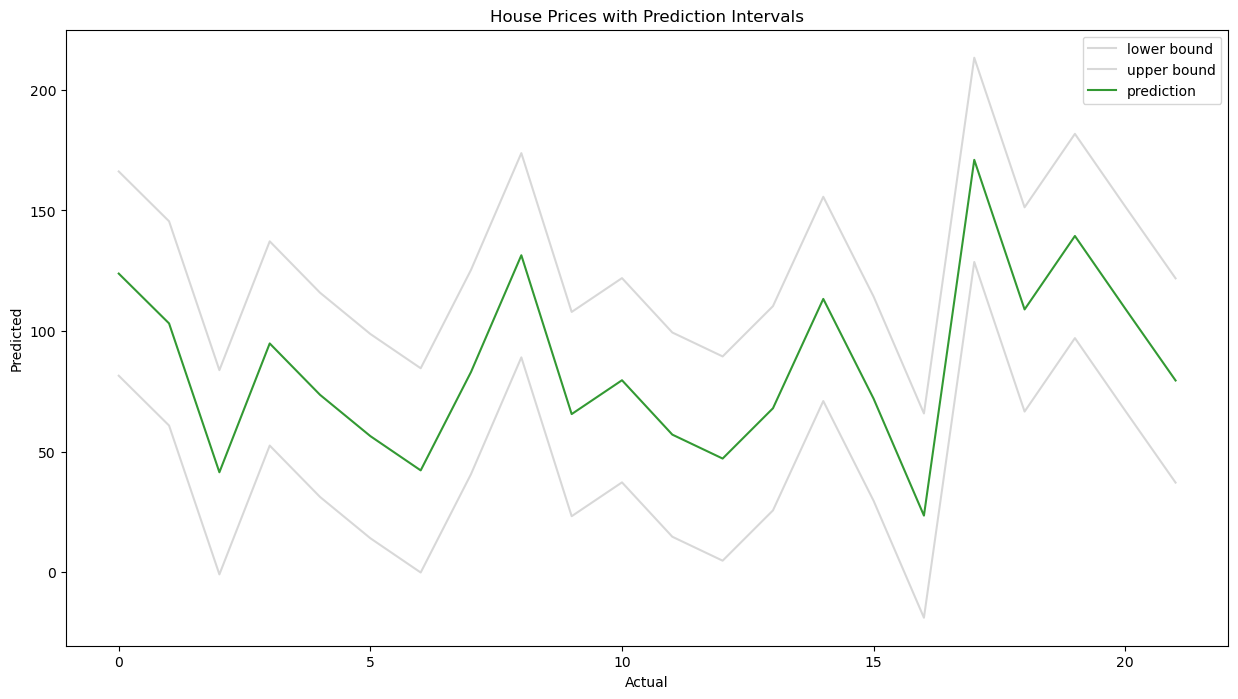

In [54]:
# Plotting the predicted and actual data 
plt.figure(figsize=(15,8))
plt.plot(lower_value,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_value,label='upper bound',alpha=0.3,color='grey')
plt.plot(pred_rr,label='prediction',alpha=0.8,color='g')
plt.title("House Prices with Prediction Intervals")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

In [57]:
# Model training
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(x_train,y_train)
print("Training R2 score: "+ str(las.score(x_train,y_train)))

Training R2 score: 0.7219703132569293


In [58]:
# Predicting on the test and evaluating the accuracy
pred_las = las.predict(x_test).reshape(-1,1)

print("Test R2 score: "+ str(metrics.r2_score(y_test,pred_las)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,pred_las)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,pred_las))))

Test R2 score: 0.6871021206360096
Test MAE: 22.240422139804146
Test RMSE: 31.894440856398965


In [62]:
pd.DataFrame(zip(las.coef_.T, x_train.columns))

,0,1
0,10.616923,PropertyType
1,-15.656134,ClubHouse
2,0.000000,School_University_in_Township
3,0.000000,Hospital_in_TownShip
4,0.000000,Mall_in_TownShip
5,0.000000,Park_Jogging_track
6,10.236551,Swimming_Pool
7,0.000000,Gym
8,0.077170,Property_Area_in_Sq_Ft
9,0.108447,Price_by_sub_area


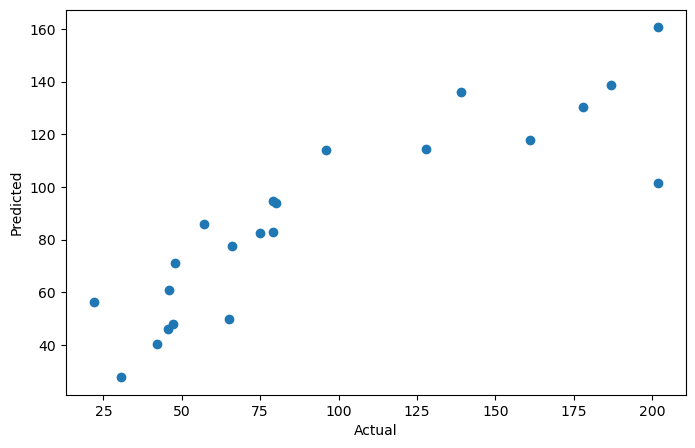

In [63]:
# Plotting the predicted and actual data 
plt.figure(figsize=(8,5))
plt.scatter(y_test,pred_las)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [65]:
# getting prediction intervals for the test data
lower_value = []
upper_value = []

for i in pred_las:
    lower, upper =  get_prediction_interval(i, y_train.values, las.predict(x_train).reshape(-1,1))
    lower_value.append(lower)
    upper_value.append(upper)

In [66]:
print(lower_value[:5])
print(upper_value[:5])

[85.41141069338872, 56.611013939708414, 3.0427777842255637, 49.564625406217544, 37.48004436869]
[175.33232418636058, 146.53192743268028, 92.96369127719743, 139.4855388991894, 127.40095786166187]


In [70]:
df_las = pd.DataFrame(zip(lower_value,upper_value,pred_las.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_las.shape)
df_las.head()

(22, 3)


,lower,upper,mean
0,85.411411,175.332324,130.371867
1,56.611014,146.531927,101.571471
2,3.042778,92.963691,48.003235
3,49.564625,139.485539,94.525082
4,37.480044,127.400958,82.440501


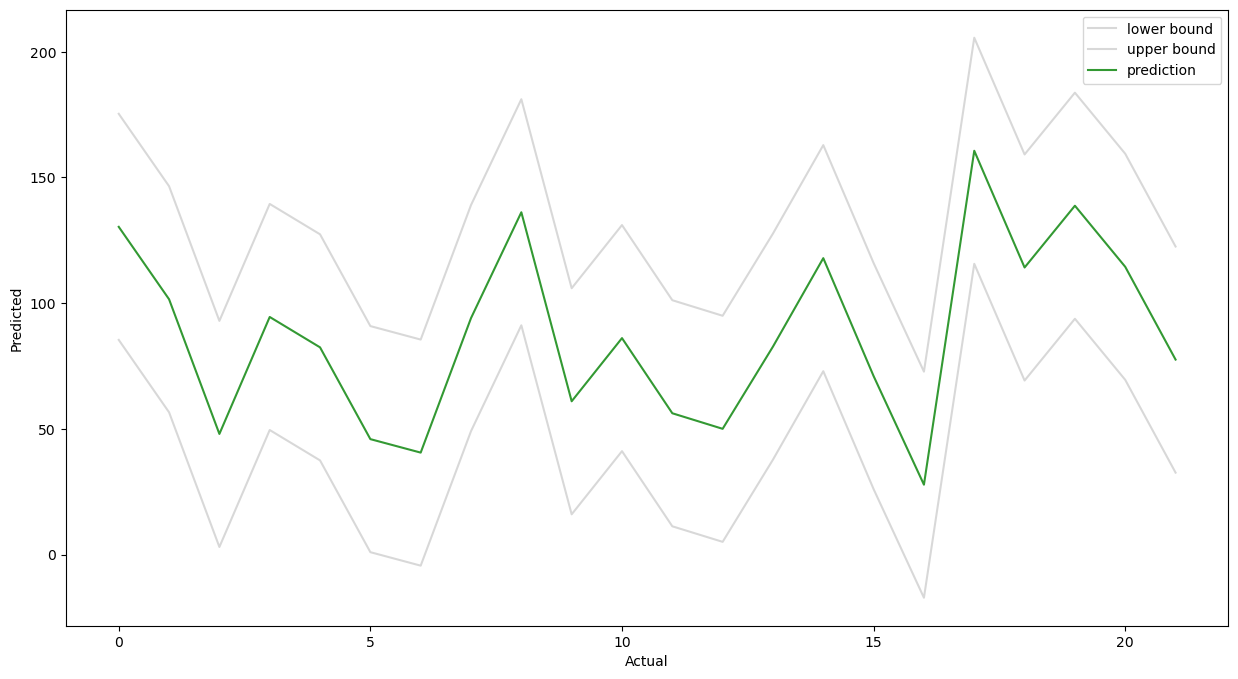

In [71]:
# Plotting the predicted and actual data 
plt.figure(figsize=(15,8))
plt.plot(lower_value,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_value,label='upper bound',alpha=0.3,color='grey')
plt.plot(pred_las,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

In [72]:
# Combining all the three algorithms
from sklearn.ensemble import VotingRegressor
import warnings
from sklearn.exceptions import DataConversionWarning

# Ignore specific warning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

estimators = [('lr',linear_reg),('rid',ridge_reg),('lasso',las)]
voting_ensemble = VotingRegressor(estimators,)
voting_ensemble.fit(x_train,y_train)
print("Training R2 score: "+ str(voting_ensemble.score(x_train,y_train)))

Training R2 score: 0.7497130735117515


In [76]:
# Predicting on the test
preds_vote = voting_ensemble.predict(x_test)
preds_vote = np.clip(preds_vote, a_min=0, a_max=None)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_vote)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_vote)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_vote))))

Test R2 score: 0.6891767007719729
Test MAE: 22.63716845956592
Test RMSE: 31.788531517877885


In [77]:
negative_predictions = preds_vote[preds_vote < 0]
negative_indices = [i for i in range(len(preds_vote)) if preds_vote[i] < 0]

# Retrieve and print the features for negative predictions
negative_cases = x_test.iloc[negative_indices]
print("Negative Predictions and Corresponding Feature Values:")
print(negative_cases)

Negative Predictions and Corresponding Feature Values:
Empty DataFrame
Columns: [PropertyType, ClubHouse, School_University_in_Township, Hospital_in_TownShip, Mall_in_TownShip, Park_Jogging_track, Swimming_Pool, Gym, Property_Area_in_Sq_Ft, Price_by_sub_area, Noun_Counts, Verb_Counts, Adjective_Counts, Amenities_score, Price_by_Amenities_score, bhk_homes, clubhouse_park, community_offers, connectivity_modern, families_proximity, gym_perfect, homes_large, large_clubhouse, park_gym, perfect_families, properties_offering, proximity_schools, schools_shopping, shopping_malls, spacious_bhk]
Index: []


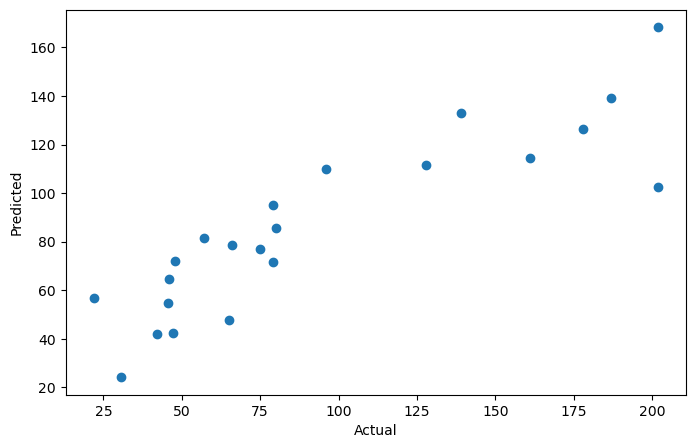

In [79]:
# Plotting the predicted and actual data 
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_vote)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [80]:
# getting prediction intervals for the test data
lower_value = []
upper_value = []

for i in preds_vote.reshape(-1,1):
    lower, upper =  get_prediction_interval(i, y_train.values, voting_ensemble.predict(x_train).reshape(-1,1))
    lower_value.append(lower)
    upper_value.append(upper)

In [83]:
print(lower_value[:5])
print(upper_value[:5])

[83.76106970219092, 59.97126599496496, -0.0837626686438071, 52.37811646918319, 34.340787023202274]
[169.07780088918994, 145.28799718196396, 85.2329685183552, 137.6948476561822, 119.65751821020129]


In [84]:
df_vote = pd.DataFrame(zip(lower_value,upper_value,preds_vote.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_vote.shape)
df_vote.head()

(22, 3)


,lower,upper,mean
0,83.761070,169.077801,126.419435
1,59.971266,145.287997,102.629632
2,-0.083763,85.232969,42.574603
3,52.378116,137.694848,95.036482
4,34.340787,119.657518,76.999153


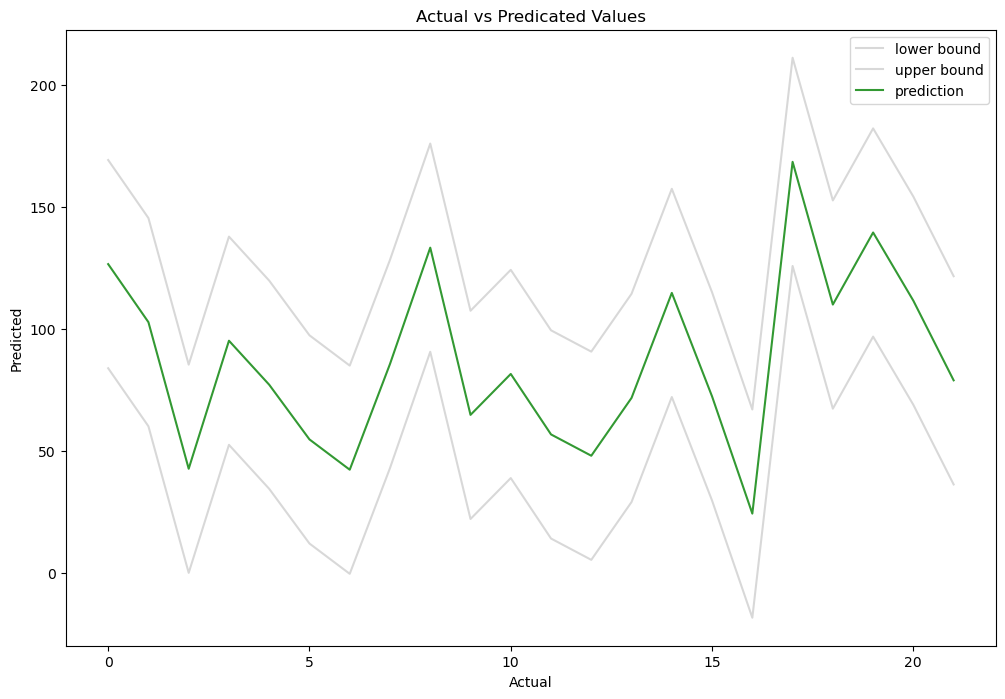

In [87]:
# Plotting the predicted and actual data 
plt.figure(figsize=(12,8))
plt.plot(lower_value,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_value,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_vote,label='prediction',alpha=0.8,color='g')
plt.title("Actual vs Predicated Values")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

In [89]:
def get_interval_estimate(actual_values, predicted_values, pi=.95):
    
    #get standard deviation of prediction on the train dataset
    sum_errs = np.sum((actual_values - predicted_values)**2)
    stdev = np.sqrt(sum_errs / (len(actual_values) - 1))
    
    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2) 
    z_score = stats.norm.ppf(ppf_lookup) 
    interval = z_score * stdev

    return interval

In [90]:
# Saving the estimated prices for future use
interval_est = get_interval_estimate(y_train.values, voting_ensemble.predict(x_train).reshape(-1,1))
print(interval_est)

import pickle
fileName = r"C:\Users\sowmy\OneDrive\Desktop\IS\interval_est.pkl"
with open(fileName,'wb') as f:
    pickle.dump(interval_est,f)

42.658365593499504


In [94]:
#saving the trained data
import joblib

fileName = r"C:\Users\sowmy\OneDrive\Desktop\IS\property_price_prediction_voting.sav"
joblib.dump(voting_ensemble,fileName)
print(f'File saved to {fileName}')


File saved to C:\Users\sowmy\OneDrive\Desktop\IS\property_price_prediction_voting.sav
